# Testing your installation of modelflow


To test that the installation of modelflow has worked properly, we will build a model using the modelflow framework and then simulate it.  A simple model that illustrates many of the functions of modelflow is the Solow growth model.

The code below first sets up the python environment by importing the modelflow  and pandas classes.  The initial two lines of code and the final two lines just set up the environment for optimal display and are not required.

To test the installation on your system you can copy this code into a Jupyter notebook and execute it.

    

In [1]:
%load_ext autoreload
%autoreload 2

#Required packages
import pandas as pd
# Modelflow modules
from modelclass import model
from modelmf import model

   
#for publication 
latex=0
model.widescreen()


## Specifying the model 

Having loaded the model class from the modelflow library, we can start constructing the model.

The first step is to define the equations of the model, using ```modelflow```'s Business Logic Language.   



:::{margin} **Business Logic Language**
More on how to specify models [here](../intro/model%20specification.ipynb)
:::

The below code segment defines a string fsolow that contains the equations for the solow model, where:
* GDP is defined as a simple Cobb-Douglas production function as the product of TFP, Capital (raised to the share of capital in total income) and Labour (raised to the share of labor in total income)
* Investment is equal to GDP less consumption
* The change in capital is equal to investment this period less the depreciation of the capital stock from the previous period
* Labor grows at the rate of growth of the variable ```Labor_growth```
* a pure reporting identity Capital_intensity the ratio of the Capital Stock to the Labor input

We thus have a system of 6 equations with 6 unknowns (GDP, Consumption, Investment, Change in the Capital stock, and change in Labor supply, and the capital_intensity) and exogenous variables (TFP, alfa,savings_rate,Depreciation_rate and Labor_growth).

:::{note}
The equations for Labor and Capital have been entered as difference equations. The ```modelflow``` object will automatically normalize them, generating an internal representation of ```Labour=Labour(t-1)*(1+Labor_growth)``` and ```Capital=Capital(t-1)*(1-Depreciation_rate)+Investment```
:::


In [2]:

fsolow = '''\
GDP          = TFP  * Capital**alfa * Labor **(1-alfa) 
Consumption     = (1-saving_rate)  * GDP 
Investment      = GDP - Consumption   
diff(Capital)   = Investment-Depreciation_rate * Capital(-1)
diff(Labor)     = Labor_growth * Labor(-1)  
Capital_intensity = Capital/Labor 
'''


To create the model we instantiate (create) a variable ```msolow``` (which will ultimately contain both the equations and data for the model) using the ```.from_eq()``` method of the ```modelflow``` class -- submitting to it the equations in string form, and giving it the name "Solow model".

In [3]:
msolow = model.from_eq(fsolow,modelname='Solow model')

The internal representation of the normalized equations can be displayed in normalized business language with the ```modelflow``` method ```.print_model```:

In [4]:
msolow.print_model

FRML <> GDP          = TFP  * CAPITAL**ALFA * LABOR **(1-ALFA)  $
FRML <> CONSUMPTION     = (1-SAVING_RATE)  * GDP  $
FRML <> INVESTMENT      = GDP - CONSUMPTION    $
FRML <> CAPITAL=CAPITAL(-1)+(INVESTMENT-DEPRECIATION_RATE * CAPITAL(-1))$
FRML <> LABOR=LABOR(-1)+(LABOR_GROWTH * LABOR(-1))$
FRML <> CAPITAL_INTENSITY = CAPITAL/LABOR  $


## Create some data 

For the moment ```msolow``` has a mathematical representation of a system of equations but no data.

To add data we  create a pandas dataframe with initial values for our exogenous variables. Technically capital and labor are endogenous in the Solow model, but because they are specified as change equations their initial values are exogenous and need to be initialized.  

The code below  instantiates (creates) a panda dataframe ```df``` and fills it with the variables for our model, initializing these with a series of values over 300 datapoints.  The final command displays the first ten rows of the dataframe.

```{note}
    Pandas data frames is a foundational class of python.  There are thousands of web sites dedicated to understanding pandas.  Some notable ones include:


```

In [5]:
N = 300  
df = pd.DataFrame({'LABOR':[100]*N,
                   'CAPITAL':[100]*N, 
                   'ALFA':[0.5]*N, 
                   'TFP': [1]*N, 
                   'DEPRECIATION_RATE': [0.05]*N, 
                   'LABOR_GROWTH': [0.01]*N, 
                   'SAVING_RATE':[0.05]*N},index=[v for v in range(2000,2300)])
df.head() #this prints out the first 5 rows of the dataframe

,LABOR,CAPITAL,ALFA,TFP,DEPRECIATION_RATE,LABOR_GROWTH,SAVING_RATE
2000,100,100,0.5,1,0.05,0.01,0.05
2001,100,100,0.5,1,0.05,0.01,0.05
2002,100,100,0.5,1,0.05,0.01,0.05
2003,100,100,0.5,1,0.05,0.01,0.05
2004,100,100,0.5,1,0.05,0.01,0.05


## Putting it together

Having defined an initial data set for all the exogenous variables, we can combine these with the equations and solve the model.

The command below solves the model ```msolow``` on the data contained in the dataframe ```df``` and stores the output in a new dataframe called ```result```.

The last line displays the values of the simulated model, which now includes results for the endogenous variables, and different values for the Labor and Capital variables reflecting their endogeneity for periods 2 through 300.

In [6]:
result = msolow(df,keep='Baseline') 
# The model is simulated for all years possible 

result.head(10)

,LABOR,CAPITAL,ALFA,TFP,DEPRECIATION_RATE,LABOR_GROWTH,SAVING_RATE,CAPITAL_INTENSITY,CONSUMPTION,GDP,INVESTMENT
2000,100.000000,100.000000,0.5,1.0,0.05,0.01,0.05,0.000000,0.000000,0.000000,0.000000
2001,101.000000,100.025580,0.5,1.0,0.05,0.01,0.05,0.990352,95.486029,100.511609,5.025580
2002,102.010000,100.076226,0.5,1.0,0.05,0.01,0.05,0.981043,95.986562,101.038487,5.051924
2003,103.030100,100.151443,0.5,1.0,0.05,0.01,0.05,0.972060,96.501546,101.580575,5.079029
2004,104.060401,100.250762,0.5,1.0,0.05,0.01,0.05,0.963390,97.030930,102.137821,5.106891
2005,105.101005,100.373733,0.5,1.0,0.05,0.01,0.05,0.955022,97.574667,102.710176,5.135509
2006,106.152015,100.519926,0.5,1.0,0.05,0.01,0.05,0.946943,98.132713,103.297593,5.164880
2007,107.213535,100.688931,0.5,1.0,0.05,0.01,0.05,0.939144,98.705029,103.900030,5.195002
2008,108.285671,100.880357,0.5,1.0,0.05,0.01,0.05,0.931613,99.291576,104.517449,5.225872
2009,109.368527,101.093830,0.5,1.0,0.05,0.01,0.05,0.924341,99.892323,105.149813,5.257491


## Create a scenario and run again 

:::{margin} **dataframe.upd**
When importing modelclass all pandas dataframes are enriched with a a handy way to create a new pandas dataframe as a copy of an existing one but with one or more series updated. 

In this case df.upd will create a a new dataframe ```dfscenaario``` with updated LABOR_GROWTH 

For more detail on the ```.upd``` method look here [here](../../howto/update/model%20update.ipynb)
:::

In [11]:
dfscenario = df.mfcalc('<2023 2200> LABOR_GROWTH = LABOR_GROWTH + 0.002')  # create a new dataframe, increase LABOR_GROWTH by 0.002
scenario   = msolow(dfscenario,keep='Higher labor growth ') # simulate the model 


## Inspect results  

```Modelflow``` includes a range of methods to view data and results, either as graphs or as tables.  Some of these are part of standard python, others are additional features that ```modelflow``` makes available.

Scenario results can be inspected either by referring to the scenario name given in the (optional) ```keep``` statement when the model was solved, by referring to the ```basedf``` and the ```lastdf```. 

* ```basedf``` is a dataframe that is automatically generated when the model is solved and contains a copy of the initial conditions of the model prior to the shock.  
* ```lastdf```is a dataframe that is automatically generated when the model is solved and contains a copy of the results from the simulation. Several built in display functions use these functions to display results.

Finally one could also look at the dataframe to which the results of the simulation were assigned ```scenario``` in the example above.

Below is a small sub-set of the visualization options available.

### Graphical representations of results

#### The .dif.plot() method

The ```.dif.plot``` method will plot the change in the level of requested variables.  Requested variables can be selected either directly by name or using wildcards.

In this example, a wild card specification is used, requesting the display of all variables that begin with the text 'labor'.  Note that the selector is not case sensitive.

In this case we are displaying changes into the labor and labor growth variables due to the shock when we increased the growth rate of labor by .0002

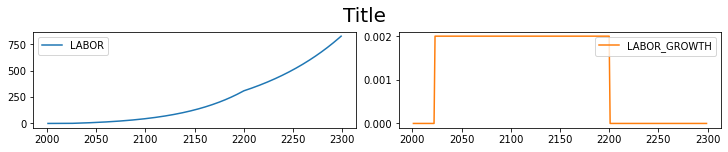

In [12]:
msolow['labor*'].dif.plot() 

In this example, instead of using a wild card selector we requested a variable explicitly by name.

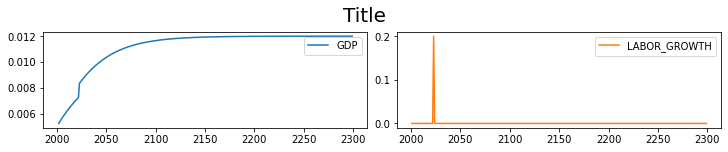

In [10]:
msolow['GDP LABOR_GROWTH'].pct.plot() 

#### Using the kept solutions 
Because the keyword ```keep``` was used when running the simulations, we can refer to the scenarios by their names -- or produce graphs from multiple scenarios -- not just the first and last. 

In [13]:

msolow.keep_plot('GDP')
    

{'GDP': <Figure size 720x432 with 1 Axes>}

### Textual and tabular display of results

Standard pandas syntax can be used to display data in the results dataframes.

Here we use the standard pandas ```.loc``` method to display every 10th data point for consumption from the results dataframe, beginning from observation 50 through 100.


In [14]:
msolow.lastdf.loc[50:100:10,'CONSUMPTION']

Series([], Name: CONSUMPTION, dtype: float64)

#### The ```.dif.df``` method

The ```.dif.df``` method prints out the changes in variables, i.e. eh difference between the level of specified  variables in the ```lastdf``` dataframe vs the ```basedf``` dataframe.



In [15]:
msolow['GDP CONSUMPTION'].dif.df

,GDP,CONSUMPTION
2001,0.000000,0.000000
2002,0.000000,0.000000
2003,0.000000,0.000000
2004,0.000000,0.000000
2005,0.000000,0.000000
...,...,...
2295,665.334581,632.067852
2296,672.097592,638.492713
2297,678.925939,644.979642
2298,685.820324,651.529308


#### The ```.difpct.df``` method

The ```.dif.pct.df``` method express the changes between the last simulation and base simulation results as a percent differences in the level (${\Delta X_t \over X^{basedf}_{t-1}} $ ).  In the example below the mul100 method multiplies the result by 100.


In [ ]:
msolow['GDP CONSUMPTION'].difpct.mul100.df

### Interactive display of impacts

When working within Jupyter notebook the dif command will produce (without the .df termination) will generate a widget with the results expressed as level differences, percent differences, differences in the growth rate -- both graphically and in table form.

Please consult [here]() for a fuller presentation of the display routines built into ```modelflfow```.

In [ ]:
msolow['GDP CONSUMPTION'].dif
